In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor

In [38]:
df = pd.read_csv("eda_data.csv")
pd.set_option('display.max_columns', None)
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer provided,min_salary,max_salary,avg_salary,company_text,job_state,same_state,age,python_yn,rstudio_yn,spark_yn,aws_yn,excel_yn,job_simplified,seniority,desc_len,num_comp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,0,50,1,0,0,0,1,data scientist,na,2555,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,0,39,1,0,0,0,0,data scientist,na,4828,1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4,FL,1,13,1,0,1,0,1,data scientist,na,3495,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL,WA,1,58,1,0,0,0,0,data scientist,na,3926,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions,NY,1,25,1,0,0,0,1,data scientist,na,2748,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\r\n...,3.9,GSK\r\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck",0,0,58,111,84.5,GSK,MA,0,193,0,0,0,1,0,na,senior,6219,3
738,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\r\nEventbrite has a world-class ...,4.4,Eventbrite\r\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",0,0,72,133,102.5,Eventbrite,TN,0,17,1,0,1,1,0,data engineer,senior,6167,3
739,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\r\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1,0,0,56,91,73.5,Software Engineering Institute,PA,1,39,0,0,0,0,1,na,na,3107,1
740,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\r\n\r\nO...,3.2,"Numeric, LLC\r\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,0,0,95,160,127.5,"Numeric, LLC",PA,0,-1,0,0,0,0,1,manager,na,1678,1


In [39]:
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'same_state', 'age', 'python_yn',
       'rstudio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simplified',
       'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [40]:
df_model = df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_comp','hourly','employer provided'
               ,'job_state','same_state','age','python_yn','spark_yn','aws_yn','excel_yn','job_simplified','seniority','desc_len']]

In [41]:
#get dummy data

In [42]:
df_dum = pd.get_dummies(df_model)
df_dum

,avg_salary,Rating,num_comp,hourly,employer provided,same_state,age,python_yn,spark_yn,aws_yn,excel_yn,desc_len,Size_-1,Size_1 to 50 employees,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,Size_5001 to 10000 employees,Size_501 to 1000 employees,Size_51 to 200 employees,Size_Unknown,Type of ownership_-1,Type of ownership_College / University,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Nonprofit Organization,Type of ownership_Other Organization,Type of ownership_School / School District,Type of ownership_Subsidiary or Business Segment,Type of ownership_Unknown,Industry_-1,Industry_Accounting,Industry_Advertising & Marketing,Industry_Aerospace & Defense,Industry_Architectural & Engineering Services,Industry_Auctions & Galleries,Industry_Banks & Credit Unions,Industry_Beauty & Personal Accessories Stores,Industry_Biotech & Pharmaceuticals,Industry_Brokerage Services,Industry_Colleges & Universities,Industry_Computer Hardware & Software,Industry_Construction,Industry_Consulting,Industry_Consumer Product Rental,Industry_Consumer Products Manufacturing,"Industry_Department, Clothing, & Shoe Stores",Industry_Education Training Services,Industry_Energy,Industry_Enterprise Software & Network Solutions,Industry_Farm Support Services,Industry_Federal Agencies,Industry_Financial Analytics & Research,Industry_Financial Transaction Processing,Industry_Food & Beverage Manufacturing,Industry_Gambling,Industry_Gas Stations,Industry_Health Care Products Manufacturing,Industry_Health Care Services & Hospitals,"Industry_Health, Beauty, & Fitness",Industry_IT Services,Industry_Industrial Manufacturing,Industry_Insurance Agencies & Brokerages,Industry_Insurance Carriers,Industry_Internet,Industry_Investment Banking & Asset Management,Industry_K-12 Education,Industry_Lending,Industry_Logistics & Supply Chain,Industry_Metals Brokers,Industry_Mining,Industry_Motion Picture Production & Distribution,Industry_Other Retail Stores,Industry_Real Estate,Industry_Religious Organizations,Industry_Research & Development,Industry_Security Services,Industry_Social Assistance,Industry_Sporting Goods Stores,Industry_Staffing & Outsourcing,Industry_Stock Exchanges,Industry_TV Broadcast & Cable Networks,Industry_Telecommunications Manufacturing,Industry_Telecommunications Services,Industry_Transportation Equipment Manufacturing,Industry_Transportation Management,Industry_Travel Agencies,Industry_Trucking,Industry_Video Games,Industry_Wholesale,Sector_-1,Sector_Accounting & Legal,Sector_Aerospace & Defense,Sector_Agriculture & Forestry,"Sector_Arts, Entertainment & Recreation",Sector_Biotech & Pharmaceuticals,Sector_Business Services,"Sector_Construction, Repair & Maintenance",Sector_Consumer Services,Sector_Education,Sector_Finance,Sector_Government,Sector_Health Care,Sector_Information Technology,Sector_Insurance,Sector_Manufacturing,Sector_Media,Sector_Mining & Metals,Sector_Non-Profit,"Sector_Oil, Gas, Energy & Utilities",Sector_Real Estate,Sector_Retail,Sector_Telecommunications,Sector_Transportation & Logistics,Sector_Travel & Tourism,Revenue_$1 to $2 billion (USD),Revenue_$1 to $5 million (USD),Revenue_$10 to $25 million (USD),Revenue_$10+ billion (USD),Revenue_$100 to $500 million (USD),Revenue_$2 to $5 billion (USD),Revenue_$25 to $50 million (USD),Revenue_$5 to $10 billion (USD),Revenue_$5 to $10 million (USD),Revenue_$50 to $100 million (USD),Revenue_$500 million to $1 billion (USD),Revenue_-1,Revenue_Less than $1 million (USD),Revenue_Unknown / Non-Applicable,job_state_AL,job_state_AZ,job_state_CA,job_state_CO,job_state_CT,job_state_DC,job_state_DE,job_state_FL,job_state_GA,job_state_IA,job_state_ID,job_state_IL,job_state_IN,job_state_KS,job_state_KY,job_state_LA,job_state_MA,job_state_MD,job_state_MI,job_state_MN,job_state_MO,job_state_NC,job_state_NE,job_state_NJ,job_state_NM,job_state_NY,job_state_OH,job_state_OR,job_state_P

In [43]:
# train and split
x = df_dum.drop("avg_salary", axis = 1)
y = df_dum.avg_salary.values
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [44]:
x_train, x_test, y_train, y_test

(     Rating  num_comp  hourly  employer provided  same_state  age  python_yn  \
 481     3.6         2       0                  0           1   43          0   
 292     3.9         1       0                  0           1   47          0   
 349     3.9         3       0                  0           0  110          1   
 174     3.7         3       0                  0           0  242          0   
 135     3.4         3       0                  0           0   80          1   
 ..      ...       ...     ...                ...         ...  ...        ...   
 71      3.6         1       0                  0           1   96          1   
 106     4.7         3       0                  0           0   11          0   
 270     3.7         3       0                  0           0  242          0   
 435     4.7         1       0                  0           1   13          1   
 102     4.3         3       0                  0           0    8          1   
 
      spark_yn  aws_yn  ex

In [45]:
# multiple linear regression
x_sm = x = sm.add_constant(x)
model = sm.OLS(y,x_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     10.23
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           9.88e-95
Time:                        01:33:40   Log-Likelihood:                -3311.1
No. Observations:                 742   AIC:                             6908.
Df Residuals:                     599   BIC:                             7567.
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                41.6162      6.780      6.138      0.000      28.300      54.932
Rating                                                3.6232      1.936      1.871      0.062      -0.179       7.426
num_comp                                              3.5957      1.301      2.763      0.006       1.040       6.152
hourly                                              -36.2921      9.170     -3.958      0.000     -54.302     -18.282
employer provided                                    31.3771     11.515      2.725      0.007       8.762      53.992
same_state                                            2.5733      2.618      0.983      0.326      -2.569       7.715
age                                                   0.0342      0.030      1.140      0.255      -0.025       0.093
python_yn                                             8.1408      2.521      3.229      0.001       3.189      13.093
spark_yn                                             -0.5391      2.919     -0.185      0.854      -6.271       5.193
aws_yn                                                1.1701      2.734      0.428      0.669      -4.199       6.539
excel_yn                                             -0.4236      2.266     -0.187      0.852      -4.873       4.026
desc_len                                             -0.0001      0.001     -0.182      0.855      -0.002       0.001
Size_-1                                              13.3947      8.624      1.553      0.121      -3.542      30.331
Size_1 to 50 employees                                1.1467      6.496      0.177      0.860     -11.611      13.904
Size_10000+ employees                                -3.3329      5.805     -0.574      0.566     -14.734       8.069
Size_1001 to 5000 employees                           5.9967      3.879      1.546      0.123      -1.622      13.616
Size_201 to 500 employees                             2.0341      3.870      0.526      0.599      -5.566       9.634
Size_5001 to 10000 employees                         -4.1356      5.420     -0.763      0.446     -14.780       6.508
Size_501 to 1000 employees                            1.8408      4.066      0.453      0.651      -6.144       9.825
Size_51 to 200 employees                              3.9753      4.421      0.899      0.369      -4.707      12.658
Size_Unknown                                         20.6964     13.984      1.480      0.139      -6.768      48.161
Type of ownership_-1                                 13.3947      8.624      1.553      0.121      -3.542      30.331
Type of ownership_College / University                6.5257     17.709      0.369      0.713     -28.253      41.304
Type of ownersh

In [46]:
from sklearn.linear_model import LinearRegression , Lasso
from sklearn.model_selection import cross_val_score

In [47]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [50]:
cross_val_score(lm,x_train,y_train,scoring="neg_mean_absolute_error", cv =3)
np.mean(cross_val_score(lm,x_train,y_train,scoring="neg_mean_absolute_error", cv =3))

-20.767902995231335

In [91]:
#lasso regression
lm_l = Lasso(alpha = 0.17)
lm_l.fit(x_train,y_train)
np.mean(cross_val_score(lm_l,x_train, y_train,scoring = "neg_mean_absolute_error"))

-19.31898769554074

In [67]:
alpha = []
error = []
for i in range (1,100):
    alpha.append(i/100)
    lml = Lasso(alpha = (i/100))
#     lm_l.fit(x_train,y_train)
    error.append(np.mean(cross_val_score(lml,x_train, y_train,scoring = "neg_mean_absolute_error",cv=3)))

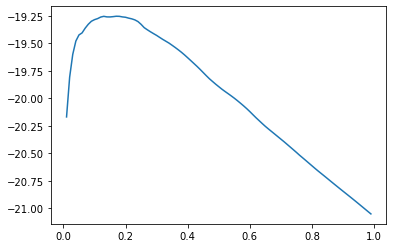

In [68]:
plt.plot(alpha,error)

In [76]:
err = tuple(zip(alpha, error))
df_err = pd.DataFrame(err, columns = ["alpha","error"])
df_err
df_err[df_err.error ==max(df_err.error)]

,alpha,error
16,0.17,-19.254933


In [79]:
# random forest regressor
rf = RandomForestRegressor()
np.mean(cross_val_score(rf,x_train, y_train,scoring = "neg_mean_absolute_error", cv = 3))

-14.998140029739014

In [85]:
# tune models GRIDsearchcv
from sklearn.model_selection import GridSearchCV
parameters = {"n_estimators": range(10,300,10), "criterion":("mse","mae"),"max_features":("auto","sqrt","log2")}

In [86]:
gs = GridSearchCV(rf,parameters,scoring="neg_mean_absolute_error",cv=3)

In [87]:
gs.fit(x_train,y_train)

C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anacond

C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anacond

C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anacond

C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anacond

C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anacond

C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anacond

C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anacond

C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anacond

C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\ana

C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\ana

C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\ana

C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\ana

C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\ana

C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\ana

C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\ana

C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\Vijaykumar Gajbhiye\ana

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [89]:
gs.best_score_
gs.best_estimator_

RandomForestRegressor(criterion='mae', n_estimators=60)

In [92]:
#test ensembles
tpred_lm = lm.predict(x_test)
tpred_lml = lm_l.predict(x_test)
tpred_rf = gs.best_estimator_.predict(x_test)

In [93]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tpred_lm)
mean_absolute_error(y_test,tpred_lml)
mean_absolute_error(y_test,tpred_rf)
mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)

93786793.35038646

In [116]:
import pickle
pickl ={"model": gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']
x_test.iloc[1,:]
llis
model.predict(np.array(list(x_test.iloc[1,:])).reshape(1,-1))[0]




C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Rating                3.6
num_comp              1.0
hourly                0.0
employer provided     0.0
same_state            1.0
                     ... 
job_simplified_mle    0.0
job_simplified_na     0.0
seniority_junior      0.0
seniority_na          1.0
seniority_senior      0.0
Name: 196, Length: 177, dtype: float64